# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [2]:
def create_padding(input_image, d):
    # Get the dimensions of the input image
    n, m = input_image.shape
    
    # Create an output image filled with zeros of shape (n + 2*d) x (m + 2*d)
    output_image = np.zeros((n + 2 * d, m + 2 * d))
    
    # Place the input image in the center of the output image
    output_image[d:d + n, d:d + m] = input_image

    return output_image
    

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [3]:
def convolution(input_image, kernel):
    # Get dimensions of the input image and kernel
    n, m = input_image.shape
    k, _ = kernel.shape
    
    # Calculate the dimensions of the output image
    output_height = n - k + 1
    output_width = m - k + 1
    output_image = np.zeros((output_height, output_width))
    
    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = input_image[i:i + k, j:j + k]
            # Element-wise multiplication and sum
            output_image[i, j] = np.sum(region * kernel)

    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [4]:
def pooling(input_image, p, pooling_type = "max_pooling"):
    # Get dimensions of the input image
    n, m = input_image.shape
    
    # Calculate the dimensions of the output image
    output_height = n - p + 1
    output_width = m - p + 1
    output_image = np.zeros((output_height, output_width))
    
    if pooling_type == "max_pooling":
        for i in range(output_height):
            for j in range(output_width):
                # Extract the p x p region of interest
                region = input_image[i:i + p, j:j + p]
                
                # Apply max pooling
                output_image[i, j] = np.max(region)

    elif pooling_type == "avg_pooling":
        for i in range(output_height):
            for j in range(output_width):
                # Extract the p x p region of interest
                region = input_image[i:i + p, j:j + p]
                
                # Apply average pooling
                output_image[i, j] = np.mean(region)

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

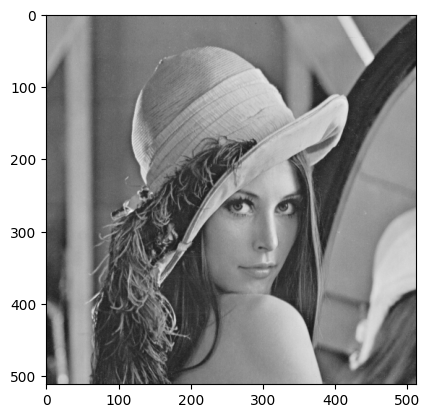

In [5]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()



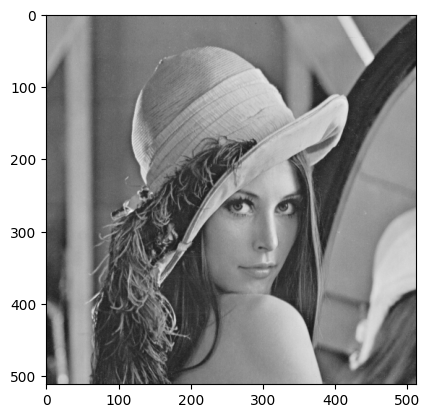

In [6]:
from PIL import Image
import cv2

# Load the image
lena = Image.open('lena.gif')
lena = lena.resize((512, 512))

plt.imshow(lena, cmap='gray')


In [7]:
# Convert to a NumPy array
lena_array = np.array(lena)

# Check the shape to confirm it's 512 x 512
print("Image shape:", lena_array.shape)


Image shape: (512, 512)


#### Test for one image

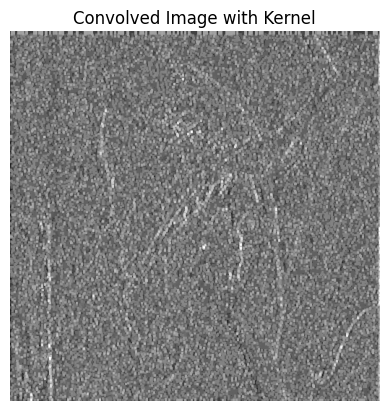

Convolved Image Shape: (512, 512)


In [15]:
kernel=np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

padding_image = create_padding(lena_array, 2)
convolved_image=convolution(padding_image, kernel)
convolved_image=pooling(convolved_image, 3)
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')
plt.title(f"Convolved Image with Kernel")
plt.show()
print(f"Convolved Image Shape:", convolved_image.shape)


**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

### 1. Vertical Edge Detection Kernel

\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}

This kernel highlights **vertical edges** by emphasizing the differences between left and right pixel intensities, effectively detecting vertical transitions in the image.

---

### 2. Horizontal Edge Detection Kernel

\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}

This kernel highlights **horizontal edges** by emphasizing changes in pixel intensity along the vertical axis.

---

### 3. Sobel Operator (Vertical)

\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}

This is a **Sobel operator** specifically for detecting vertical edges, with a higher emphasis on changes in the vertical direction than a simple edge detection kernel.

---

### 4. Sobel Operator (Horizontal)

\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}

This Sobel operator is designed for detecting **horizontal edges** with greater sensitivity to intensity changes along the vertical direction.

---

### 5. Custom Kernel
For the fifth kernel, you may choose one that serves another purpose, such as sharpening or blurring, based on your interest. An example might be:

\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}

This kernel enhances edges, giving a **sharpened effect** to the image.


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

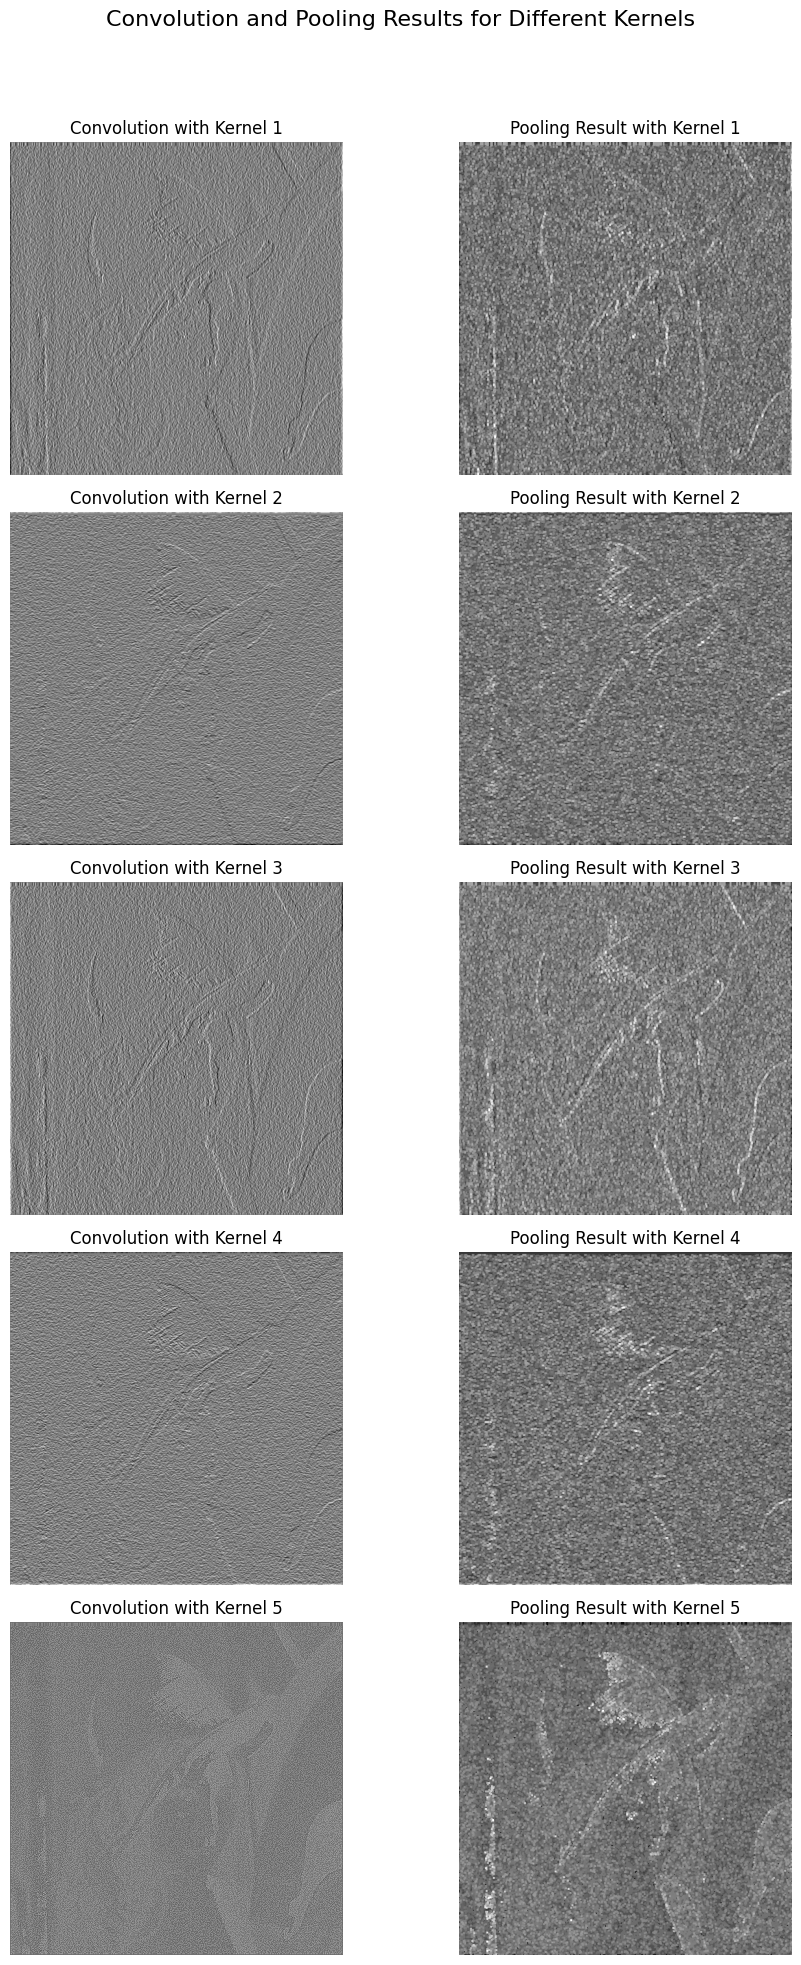

In [14]:
# Define kernels
kernels = [
    np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),  # Vertical edge detection
    np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),  # Horizontal edge detection
    np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),  # Sobel vertical
    np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),  # Sobel horizontal
    np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Custom (sharpening)
]

# # Apply convolution and display results
# for i, kernel in enumerate(kernels):
#     convolved_image = create_padding(lena_array, 2)
#     convolved_image=convolution(convolved_image, kernel)
#     convolved_image=pooling(convolved_image, 3)
#     plt.imshow(convolved_image, cmap='gray')
#     plt.axis('off')
#     plt.title(f"Convolved Image with Kernel {i+1}")
#     plt.show()
#     print(f"Convolved Image {i+1} Shape:", convolved_image.shape)

# Display results for each kernel
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
fig.suptitle("Convolution and Pooling Results for Different Kernels", fontsize=16)

for i, kernel in enumerate(kernels):
    padding_image = create_padding(lena_array, 2)
    convolved_image=convolution(padding_image, kernel)
    pooled_image=pooling(convolved_image, 3)
    
    # Show convolution result
    axes[i, 0].imshow(convolved_image, cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Convolution with Kernel {i + 1}")
    
    # Show pooling result
    axes[i, 1].imshow(pooled_image, cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"Pooling Result with Kernel {i + 1}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 


The experiment was somewhat successful in detecting edges within the Lena image. Each kernel highlighted specific types of edges or features, demonstrating how different kernels emphasize various structural aspects in an image:

1. Vertical Edge Detection Kernel
This kernel successfully emphasized vertical features in the image, such as the edges along vertical borders, but was limited in detecting horizontal or diagonal features. It highlighted boundaries but missed details that were not vertically aligned.

2. Horizontal Edge Detection Kernel
Effective for capturing horizontal edges, this kernel enhanced contours along horizontal transitions. While it successfully detected horizontal borders, it struggled to capture vertical or angled edges, making it more selective in edge detection.

3. Sobel Operator (Vertical)
The Sobel Vertical Kernel detected vertical edges with greater emphasis on gradient changes. It was more successful at capturing nuanced vertical structures than the simple vertical edge detection kernel, though it occasionally introduced some noise.

4. Sobel Operator (Horizontal)
Similar to the vertical Sobel operator, the Sobel Horizontal Kernel captured horizontal edges with added sensitivity. This kernel provided richer horizontal detail, but, like its vertical counterpart, it also occasionally amplified noise in smoother areas.

5. Custom Sharpening Kernel
This kernel acted as a sharpening filter, enhancing edges in all directions and bringing out details across various orientations. While it effectively increased the overall sharpness, it also introduced artifacts, which could be detrimental in smoother regions.

Pooling Observations
The pooling operation helped reduce the resolution and retain prominent features while filtering out some finer details, simplifying the image structure.

Summary
Overall, the experiment provided a meaningful comparison of different convolutional filters, illustrating how edge detection kernels can selectively enhance specific features. This exercise highlighted the importance of choosing kernels based on target edge orientation and feature detail, with combinations of kernels providing a comprehensive view of edges within an image.

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

#### 1. Import Necessary Libraries

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 2. Load the CIFAR-10 Dataset

In [17]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### 3. Define a Function to Build CNN Model

In [18]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### 4. Perform 5-Fold Cross-Validation

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracies = []

for train_index, val_index in kf.split(x_train):
    model = create_cnn_model()
    history = model.fit(
        x_train[train_index], y_train[train_index],
        epochs=15,
        batch_size=64,
        validation_data=(x_train[val_index], y_train[val_index]),
        verbose=1
    )
    val_loss, val_accuracy = model.evaluate(x_train[val_index], y_train[val_index], verbose=0)
    cross_val_accuracies.append(val_accuracy)

average_cross_val_accuracy = np.mean(cross_val_accuracies)
print(f"Average Cross-Validation Accuracy: {average_cross_val_accuracy:.4f}")

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2679 - loss: 1.9637 - val_accuracy: 0.4695 - val_loss: 1.4622
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4741 - loss: 1.4391 - val_accuracy: 0.5472 - val_loss: 1.2297
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5536 - loss: 1.2519 - val_accuracy: 0.5892 - val_loss: 1.1361
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5941 - loss: 1.1505 - val_accuracy: 0.6256 - val_loss: 1.0474
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6336 - loss: 1.0385 - val_accuracy: 0.6615 - val_loss: 0.9686
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6615 - loss: 0.9711 - val_accuracy: 0.6752 - val_loss: 0.9309
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6838 - loss: 0.9076 - val_accuracy: 0.6863 - val_loss: 0.8962
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7006 - loss: 0.8678 - val_accur

#### 5. Evaluate on the Test Set

In [21]:
# Select the best-performing model or re-train on the entire training set
final_model = create_cnn_model()
final_model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1)
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2667 - loss: 1.9525
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4998 - loss: 1.3869
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5722 - loss: 1.2055
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6161 - loss: 1.0858
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6545 - loss: 0.9919
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6732 - loss: 0.9253
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6941 - loss: 0.8730
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7083 - loss: 0.8403
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7291 - loss: 0.7783
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7364 - loss: 0.7535
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7501 - loss: 0.7140
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step

In [23]:
# Select the best-performing model or re-train on the entire training set
final_model = create_cnn_model()
final_model.fit(x_train, y_train, epochs=15, batch_size=64, verbose=1)
test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2713 - loss: 1.9344
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5040 - loss: 1.3707
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5825 - loss: 1.1799
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6232 - loss: 1.0759
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6638 - loss: 0.9678
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6891 - loss: 0.8881
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7120 - loss: 0.8281
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7269 - loss: 0.7764
Epoch 9/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7438 - loss: 0.7360
Epoch 10/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7577 - loss: 0.6865
Epoch 11/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7641 - loss: 0.6713
Epoch 12/15
782/782 ━━━━━━━━━━━━━━

#### 6. Confusion Matrix and Precision-Recall

In [24]:
# Predict labels on the test set
y_pred = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for precision and recall
class_report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report (Precision and Recall):")
print(class_report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[800   9  20  19  23   1  10  16  85  17]
 [ 36 835   5  11   3   4  14   7  39  46]
 [ 98   3 509  57 125  74  90  25  17   2]
 [ 18   2  40 561  72 157  83  37  18  12]
 [ 23   3  33  57 733  22  56  60  12   1]
 [ 13   2  26 171  53 644  41  46   1   3]
 [  6   0  25  52  41  12 849   7   8   0]
 [ 15   0   8  43  82  51  10 780   4   7]
 [ 60  13   5  20   6   5   6   6 871   8]
 [ 56  87  10  28   8   3  14  33  56 705]]
Classification Report (Precision and Recall):
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1000
           1       0.88      0.83      0.85      1000
           2       0.75      0.51      0.61      1000
           3       0.55      0.56      0.56      1000
           4       0.64      0.73      0.68      1000
           5       0.66      0.64      0.65      1000
           6       0.72      0.85      0.78      1000
           7       0.77      0.

#### plot confution matix

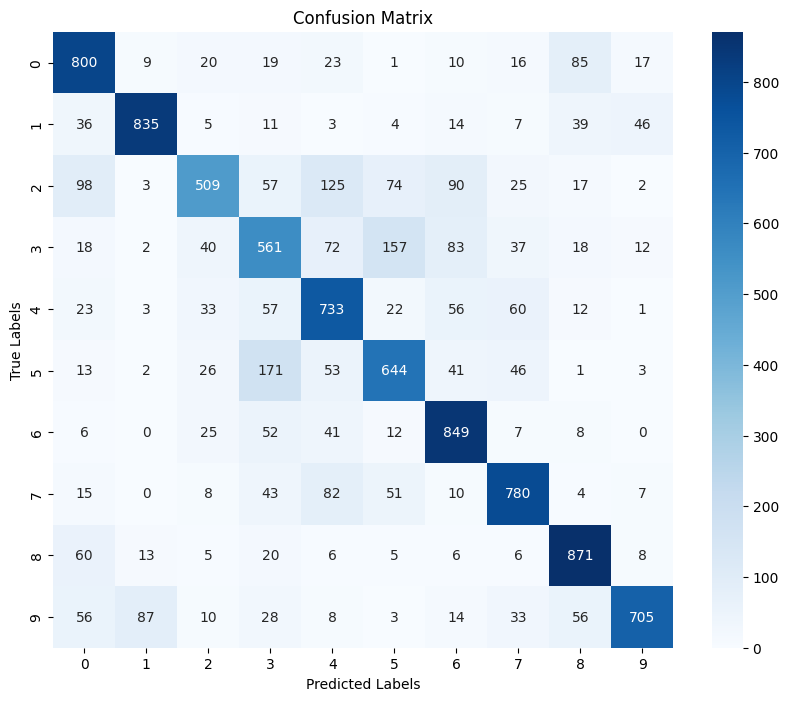

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

The results from the experiment demonstrate a reasonable performance overall, with an accuracy of **73%** on the CIFAR-10 dataset. However, upon examining the confusion matrix and classification report, we can identify specific trends in the model's performance across different classes.

##### Classes That Were Difficult to Classify

- **Class 2 (Bird)**: The precision is **0.75**, and recall is notably lower at **0.51**, indicating that while many predictions for this class were correct, the model struggled to identify birds accurately, resulting in a significant number of false negatives. The model likely confused birds with other classes, particularly with classes that feature similar colors or shapes.

- **Class 3 (Cat)**: This class has both low precision (**0.55**) and recall (**0.56**). The model appears to have significant difficulty distinguishing cats from other classes, leading to many misclassifications. This suggests that the features learned by the model may not be adequately capturing the distinguishing characteristics of cats compared to other classes.

- **Class 5 (Deer)**: With precision at **0.66** and recall at **0.64**, the performance is moderate but not strong. There may be a lack of distinctive features in the dataset for this class, causing it to be confused with other classes, particularly those that may have similar textures or colors.

- **Class 4 (Frog)**: The precision is **0.64**, and recall is **0.73**. While the recall is decent, indicating that the model successfully identifies a good portion of the frogs, the precision suggests many frogs were misclassified as other classes.

##### Overall Success of the Experiment

In my opinion, the experiment was moderately successful. The model achieved reasonable accuracy, but there is still significant room for improvement, especially for the more challenging classes. The confusion matrix highlights specific classes where misclassifications are prevalent, which is critical information for model improvement.

##### Lessons Learned

1. **Feature Representation**: The results indicate that the current architecture may not have effectively captured the unique features required to distinguish between certain classes. Exploring different network architectures or tuning hyperparameters (e.g., increasing the number of layers or using different activation functions) could lead to better performance.

2. **Data Augmentation**: Implementing data augmentation techniques (e.g., rotations, shifts, or flips) could enhance the diversity of the training data and help the model generalize better across classes.

3. **Class Imbalance**: Although CIFAR-10 has a balanced number of images per class, the model's performance variability across classes suggests the need for further exploration into class imbalance issues and strategies to address them, such as re-sampling techniques or applying class weights during training.

4. **Fine-Tuning and Transfer Learning**: Utilizing pre-trained models (e.g., from the ImageNet dataset) and fine-tuning them on CIFAR-10 might yield better results, especially for challenging classes, as these models often have richer feature representations.

5. **Evaluation Metrics**: Understanding the importance of metrics like precision and recall helps in better assessing model performance beyond accuracy. These metrics provide insight into which classes the model performs well on and where improvements are needed.

Overall, this experiment provided valuable insights into both the strengths and weaknesses of the CNN model applied to the CIFAR-10 dataset. Future work can build on these findings to improve classification performance and address the specific challenges identified.

## END